In [1]:
%pwd

import warnings
warnings.filterwarnings('ignore')
#Import necesary modules
#Use shorter names (np, pd, plt) instead of full (numpy, pandas, matplotlib.pylot) for convenience
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd
import numpy.ma as ma
import h5py
import s3fs
import matplotlib.pyplot as plt
import netCDF4
import xarray as xr
import load_in_beam
import compute_CLD as FSDutil

# Use seasborn for nicer looking inline plots if available 
#import seaborn as sns
#sns.set(context='notebook', style='darkgrid')
#st = axes_style("whitegrid")


In [2]:
ATL07file='processed_ATL07-01_20181130235806_09680101_001_01.h5'
# ATL07file='processed_ATL07-01_20181206115828_10520101_001_01.h5'
localFilePath='/home/jovyan/Data/'+ATL07file

print(localFilePath)

ds1r = load_in_beam.read_beam(filename=localFilePath,beam='gt1r')

/home/jovyan/Data/processed_ATL07-01_20181130235806_09680101_001_01.h5
/home/jovyan/Data/processed_ATL07-01_20181130235806_09680101_001_01.h5


252561


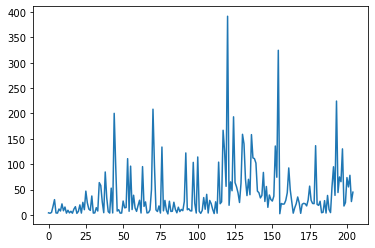

In [3]:



good = ds1r.quality_flag[:] > 0

q = ds1r.isita_lead
print(len(q))

# From Suzanne D. 
# for ii,item in enumerate(zip(li,li[1:])):
#    if item == (0,1):
#        print(ii)


startvec = np.concatenate([[0],q])
endvec = np.concatenate([q, [0]])

up = (startvec[:-1]==0) & (startvec[1:]==1)
down = (endvec[:-1]==1) & (endvec[1:]==0)
startind = np.concatenate(np.where(up==1))
startind = startind - 1 # because we prepended a zero

endind = np.concatenate(np.where(down==1))

# For debugging
# q = np.array([0,1,1,1,1,0,0,0,1,0,1])
# print(q)
# print(startvec[:-1])
# print(startvec[1:])
# print(up)
# print(startind)
# print(endind)


startx = ds1r.seg_dist[startind]
startx = startx.drop(('lat','lon','time','delta_time','lon360','segs'))
endx = ds1r.seg_dist[endind]

endx = endx.drop(('lat','lon','time','delta_time','lon360','segs'))

chord_length = endx - startx

# print(startind)
# print(endind)


plt.plot(chord_length)


In [4]:
# now just look at the code I made
CLD = FSDutil.get_CLD(ds1r)


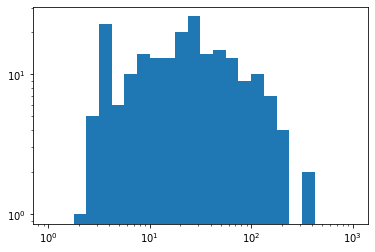

In [5]:
xbuckets = np.logspace(0, 3, num=25, endpoint=True, base=10.0, dtype=None)
hist,edges = np.histogram(chord_length,xbuckets)

plt.hist(chord_length,bins=edges)
plt.yscale('log')
plt.xscale('log')

In [6]:
namer = ['gt1r','gt1l','gt2r','gt2l','gt3l'] #'gt3r' is missing a field

CLD = []

for beam_ind in range(len(namer)):

    beam_data = load_in_beam.read_beam(filename=localFilePath,beam=namer[beam_ind]);
    newCLD = FSDutil.get_CLD(beam_data)
    
    CLD = np.concatenate([CLD,newCLD])
    

/home/jovyan/Data/processed_ATL07-01_20181130235806_09680101_001_01.h5
/home/jovyan/Data/processed_ATL07-01_20181130235806_09680101_001_01.h5
/home/jovyan/Data/processed_ATL07-01_20181130235806_09680101_001_01.h5
/home/jovyan/Data/processed_ATL07-01_20181130235806_09680101_001_01.h5
/home/jovyan/Data/processed_ATL07-01_20181130235806_09680101_001_01.h5


Text(0, 0.5, 'Number')

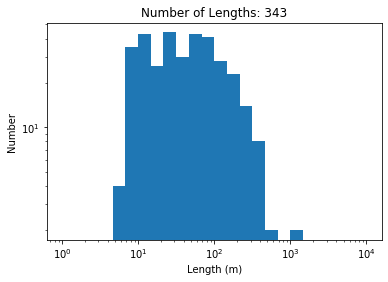

In [7]:

xbuckets = np.logspace(0, 4, num=25, endpoint=True, base=10.0, dtype=None)
hist,edges = np.histogram(CLD,xbuckets)

plt.hist(CLD,bins=edges)
plt.yscale('log')
plt.xscale('log')
plt.title('Number of Lengths: ' + str(len(CLD)))
plt.xlabel('Length (m)')
plt.ylabel('Number')